# Customer Segmentation

### Import necessary libraries

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

### Read the customer dataset

Dataset has been provided in the repository code folder and please download the dataset and copy the path and paste it in the below code

In [29]:
df_customers = pd.read_csv("/content/customers.csv")
df_customers

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### Let' understand the dataset with describe method

In [30]:
df_customers.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Try to understand the relation between two variables

In [31]:
df_customers.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


### Observe the correlation using a heat map

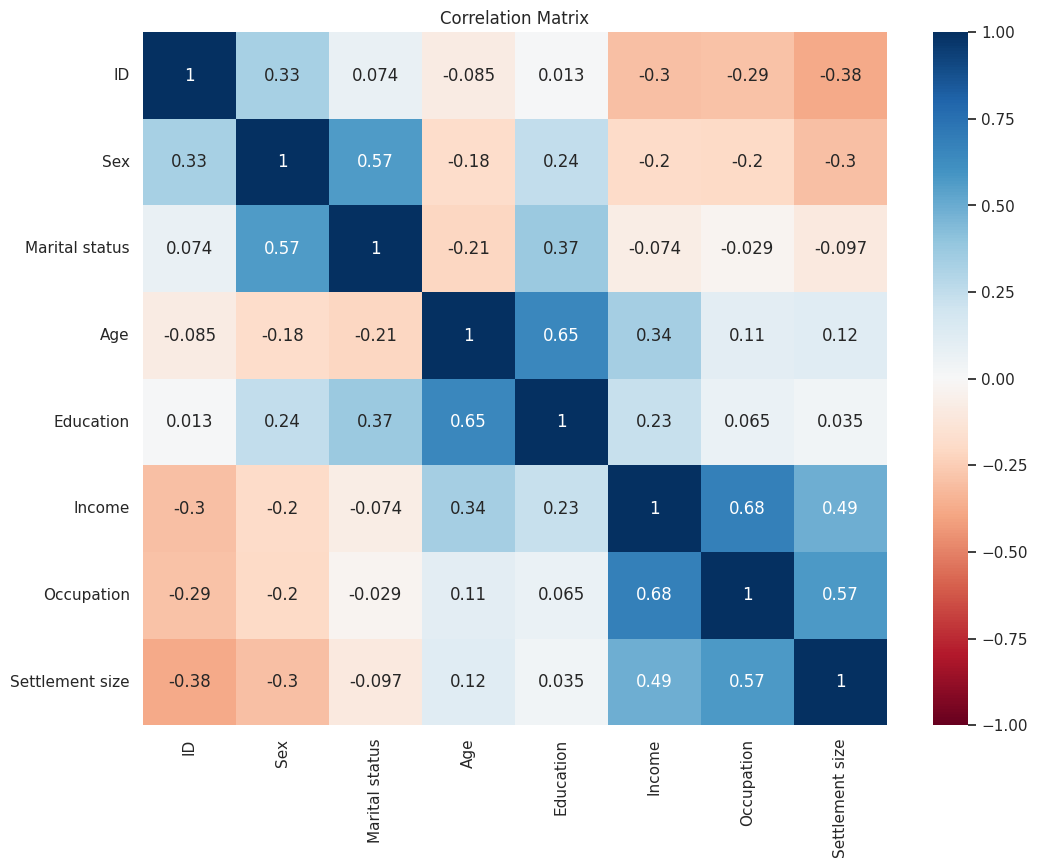

In [32]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_customers.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

### Scatter plot between Age and Income

##### Scatter plot reviles the relationships between variables in details.

Text(0, 0.5, 'Income')

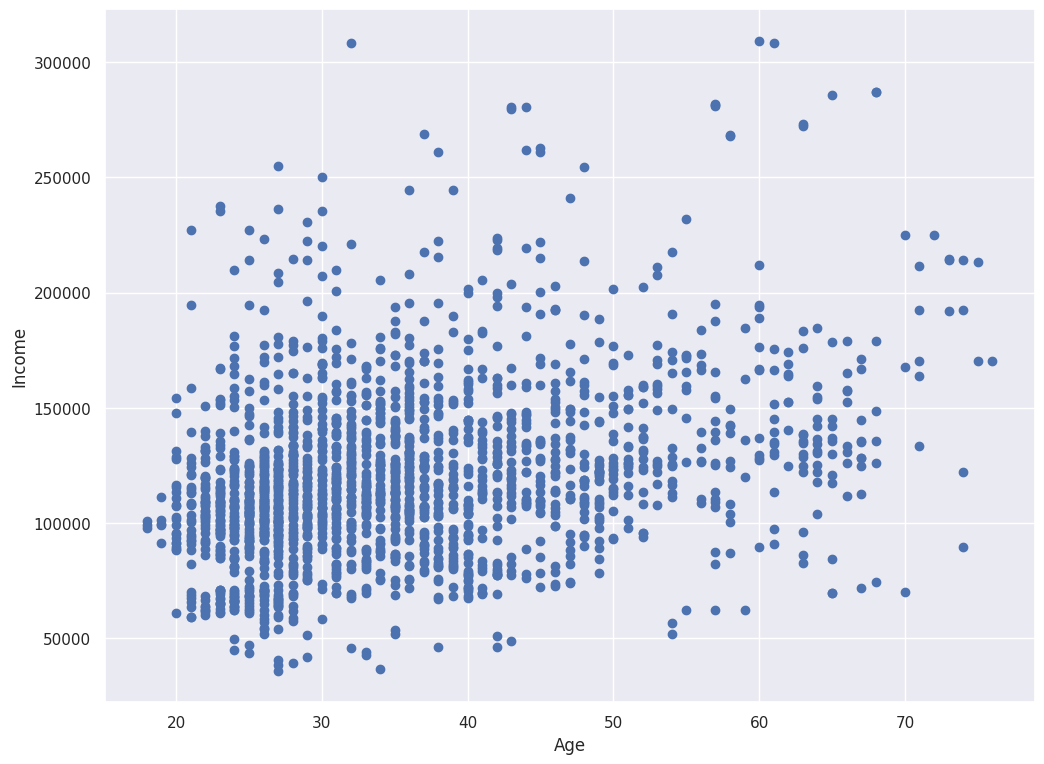

In [33]:
plt.figure(figsize=(12, 9))
# plt.scatter(df_customers.iloc[:, 2], df_customers.iloc[:, 4])
plt.scatter(df_customers['Age'], df_customers['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

### Standardize the dataframe

In [34]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

In [35]:
customers_std

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

---

### K-means clustering

In [36]:
results = {}

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customers_std)
    results[i] = kmeans.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

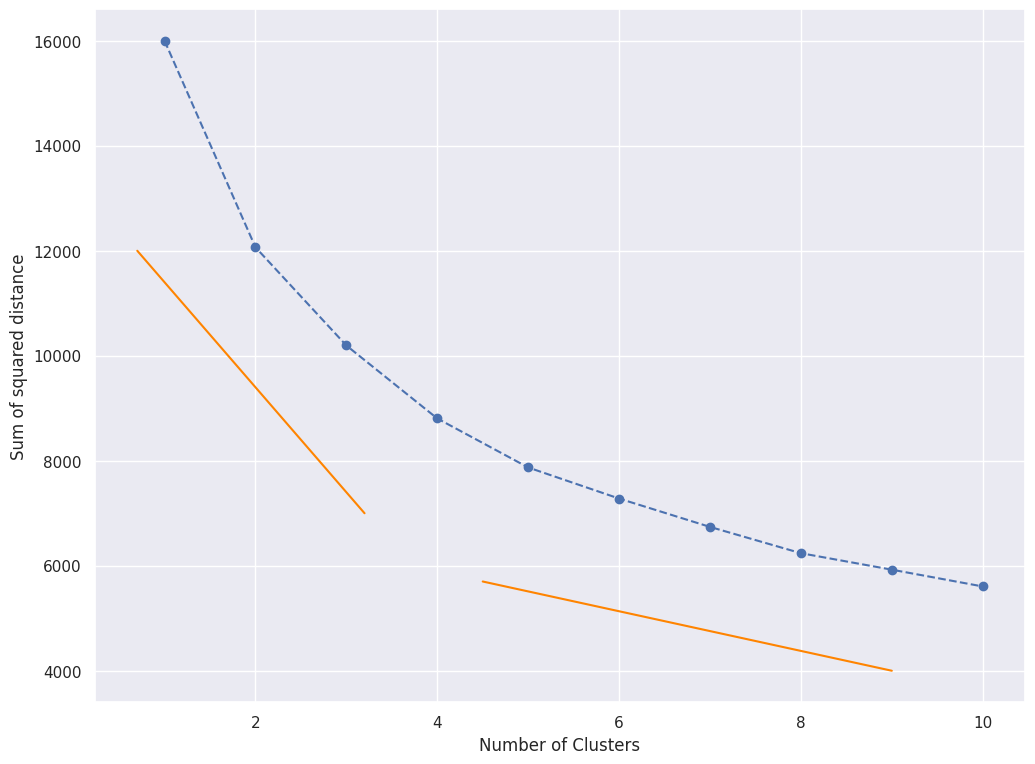

In [37]:
plt.figure(figsize=(12, 9))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.plot([0.7, 3.2], [12000, 7000], color='#FF8400')
plt.plot([4.5, 9], [5700, 4000], color='#FF8400')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### K-means clustering with 4 clusters

In [38]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customers_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [39]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = kmeans.labels_  # It will contain the predicted clusters for each observation in our data set
df_customers_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,100000001,0,0,67,2,124670,1,2,3
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,2
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,2
1998,100001999,1,1,24,1,97968,0,0,0


#### let's try to understand the characteristics of the people in each cluster

In [40]:
df_customers_analysis = df_customers_kmeans.groupby('Segment').mean().round(3)
df_customers_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,,
0,1.000011e+08,0.876,0.999,29.003,1.068,105597.536,0.630,0.418
1,1.000007e+08,0.030,0.179,35.633,0.737,139944.603,1.250,1.388
2,1.000014e+08,0.403,0.043,34.690,0.742,94407.322,0.255,0.060
3,1.000009e+08,0.485,0.681,55.815,2.126,156320.200,1.096,1.081


In [41]:
df_customers_analysis['Count'] = df_customers_kmeans[['Segment', 'Sex']].groupby('Segment').count()
df_customers_analysis['%'] = df_customers_analysis['Count'] / df_customers_analysis['Count'].sum()
df_customers_analysis.rename(index={
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
}, inplace=True)

df_customers_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Count,%
Segment,,,,,,,,,,
well-off,1.000011e+08,0.876,0.999,29.003,1.068,105597.536,0.630,0.418,679,0.3395
fewer-opportunities,1.000007e+08,0.030,0.179,35.633,0.737,139944.603,1.250,1.388,632,0.3160
standard,1.000014e+08,0.403,0.043,34.690,0.742,94407.322,0.255,0.060,419,0.2095
career-focused,1.000009e+08,0.485,0.681,55.815,2.126,156320.200,1.096,1.081,270,0.1350


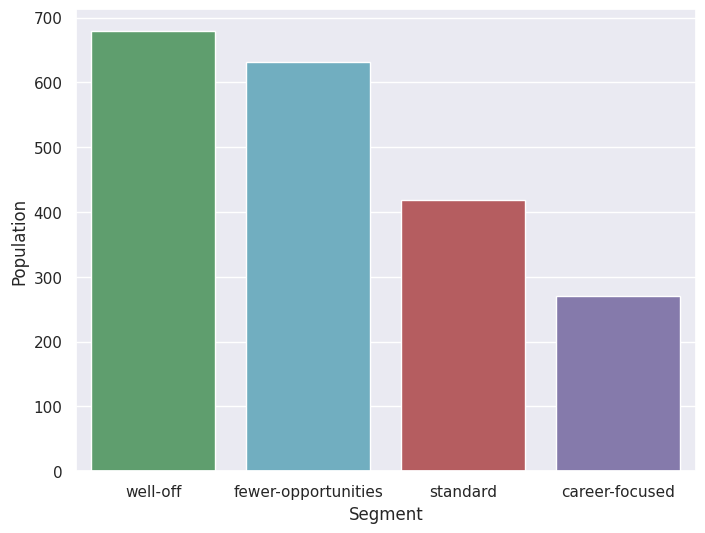

In [42]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_customers_analysis, x=df_customers_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

#### Assign meaningful labels to the segments

In [43]:
df_customers_kmeans['Segment'] = df_customers_kmeans['Segment'].map({
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
})
df_customers_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,100000001,0,0,67,2,124670,1,2,career-focused
1,100000002,1,1,22,1,150773,1,2,well-off
2,100000003,0,0,49,1,89210,0,0,standard
3,100000004,0,0,45,1,171565,1,1,fewer-opportunities
4,100000005,0,0,53,1,149031,1,1,fewer-opportunities
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,standard
1996,100001997,1,1,27,1,117744,1,0,well-off
1997,100001998,0,0,31,0,86400,0,0,standard
1998,100001999,1,1,24,1,97968,0,0,well-off


### Visualize the segmented customers

#### (Age vs Income)

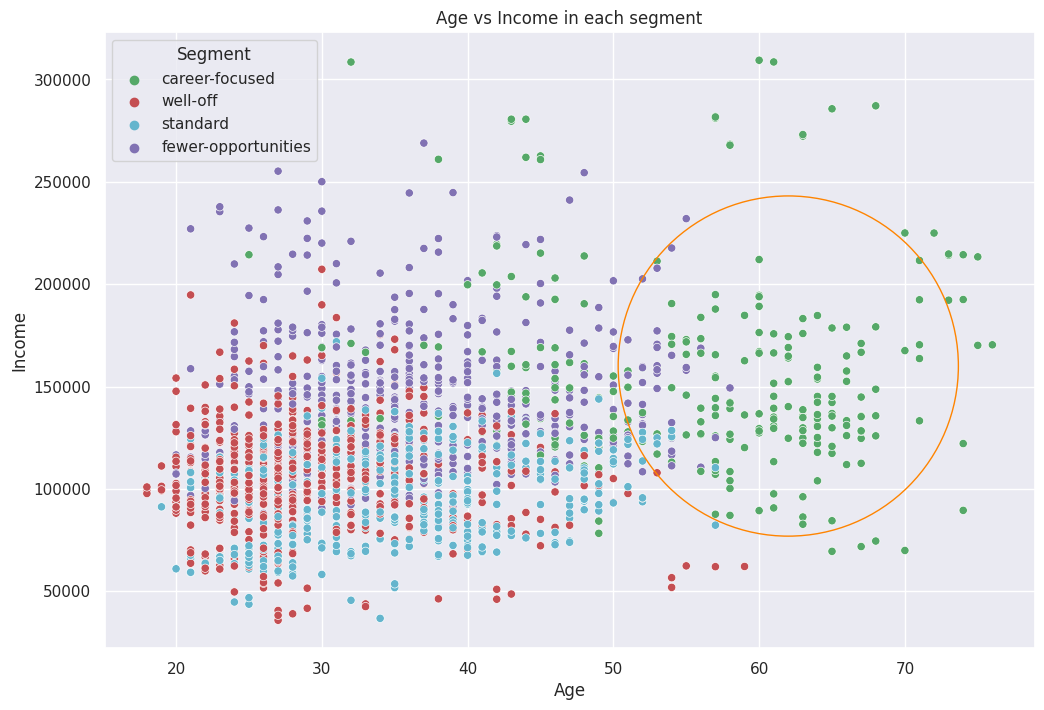

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(62, 160000 , s=60000, facecolors='none', edgecolors='#FF8400' )
plt.title('Age vs Income in each segment')
plt.show()

#### (Education vs Income)

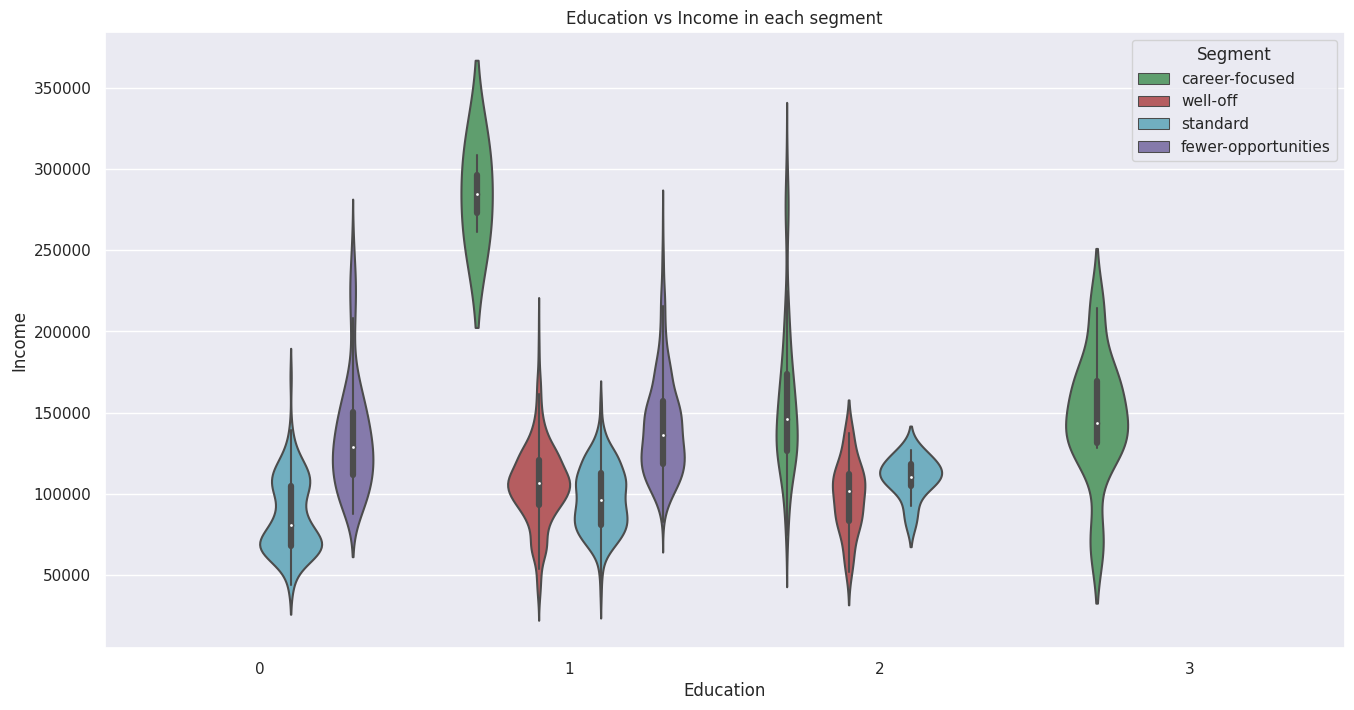

In [45]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.title('Education vs Income in each segment')
plt.show()

---

### Improve k-means with PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_std)

pca.explained_variance_ratio_

array([0.34103573, 0.23178599, 0.16650585, 0.09955452, 0.06169548,
       0.04785186, 0.03407515, 0.01749541])

Let’s plot the cumulative sum of the variability against the number of components.

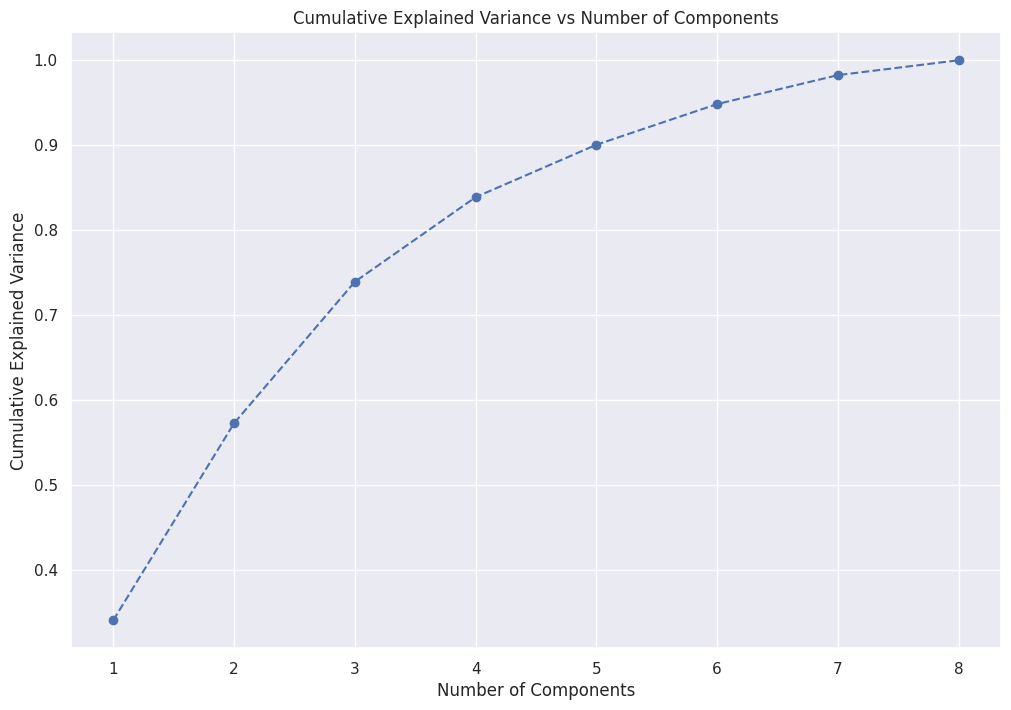

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()


Let’s pick 3 components and fit our pca model.

In [48]:
pca = PCA(n_components=3)
pca.fit(customers_std)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df_customers.columns.values,
    index=['component 1', 'component 2', 'component 3'])

df_pca_components

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.3454,-0.3286,-0.1873,0.2703,0.1045,0.4838,0.4617,0.4543
component 2,0.1072,0.4213,0.4721,0.3553,0.6528,0.1763,0.0614,-0.0308
component 3,0.1435,-0.3180,-0.4854,0.6134,0.2523,-0.1236,-0.3446,-0.2621


New correlation matrix for the three selected components

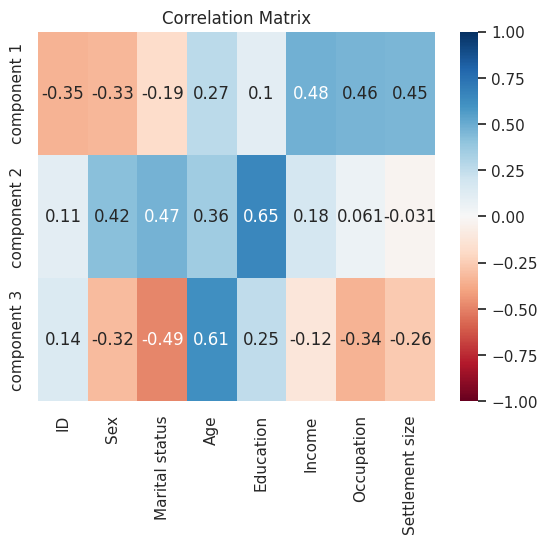

In [49]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

### Implementing K-Means Clustering

Let's implement k-means clustering considering our three components as features.

In [50]:
pca_scores = pca.transform(customers_std)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

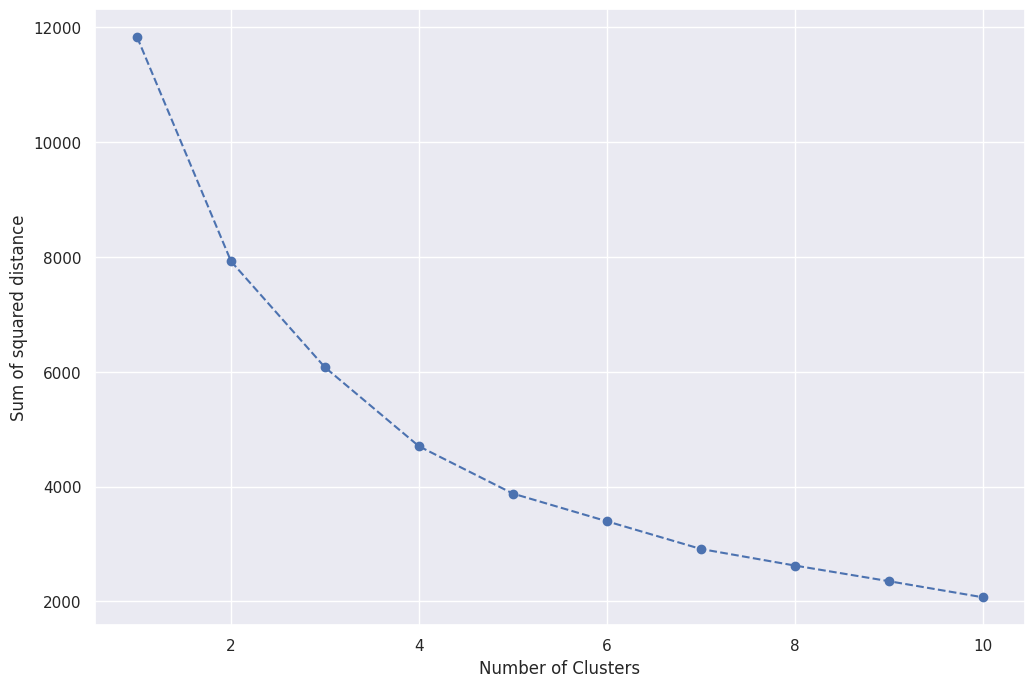

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### Implementing K-Means Clustering with 4 clusters

In [52]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [53]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,3
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,3
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,0
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,3
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,0


### Analyze segmentation results

In [54]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
K-means PCA,,,,,,,,,,,
0,1.000012e+08,0.9190,0.9670,28.9580,1.0645,106617.4678,0.6597,0.4273,-1.2052,0.6160,-0.8333
1,1.000009e+08,0.4925,0.6791,55.8731,2.1306,156430.7276,1.0970,1.0821,1.4836,2.1527,0.8934
2,1.000007e+08,0.0363,0.1940,35.4669,0.7397,140435.2192,1.2555,1.3943,1.4720,-0.9359,-0.1875
3,1.000013e+08,0.3387,0.0998,34.9026,0.7564,92426.0394,0.2111,0.0441,-1.2228,-0.9152,1.0098


- **Segment 0**: low career and experience values with high education and lifestyle values.
  Label: Standard
- **Segment 1**: high career but low education, lifestyle and experience
  Label: Career focused
- **Segment 2**: low career, education and lifestyle, but high life experience
  Label: Fewer opportunities
- **Segment 3**: high career, education and lifestyle as well as high life experience
  Label: Well-off


In [55]:
df_segm_pca_analysis['Count'] = df_segm_pca[['K-means PCA', 'Sex']].groupby(['K-means PCA']).count()
df_segm_pca_analysis['%'] = df_segm_pca_analysis['Count'] / df_segm_pca_analysis['Count'].sum()
df_segm_pca_analysis.rename(index={
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
}, inplace=True)

df_segm_pca_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,Count,%
K-means PCA,,,,,,,,,,,,,
standard,1.000012e+08,0.9190,0.9670,28.9580,1.0645,106617.4678,0.6597,0.4273,-1.2052,0.6160,-0.8333,667,0.3335
career-focused,1.000009e+08,0.4925,0.6791,55.8731,2.1306,156430.7276,1.0970,1.0821,1.4836,2.1527,0.8934,268,0.1340
fewer-opportunities,1.000007e+08,0.0363,0.1940,35.4669,0.7397,140435.2192,1.2555,1.3943,1.4720,-0.9359,-0.1875,634,0.3170
well-off,1.000013e+08,0.3387,0.0998,34.9026,0.7564,92426.0394,0.2111,0.0441,-1.2228,-0.9152,1.0098,431,0.2155


Let’s take a look at the number of customers per segment:

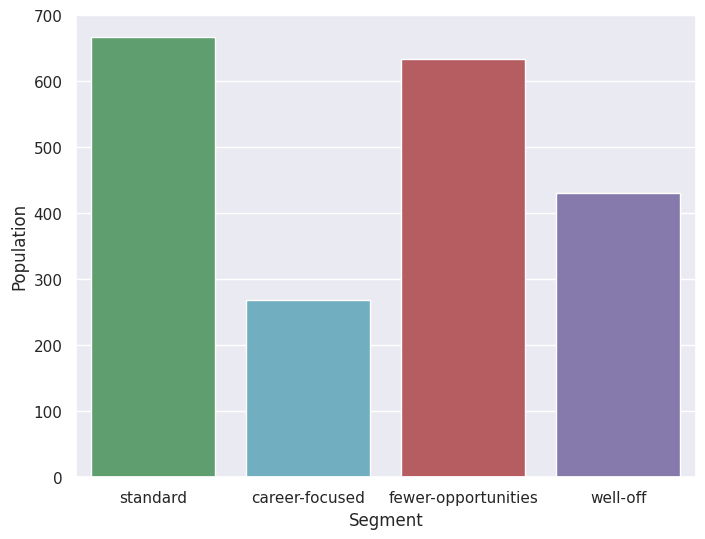

In [56]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

Add the segment labels to the original dataset

In [57]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
})
df_segm_pca

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA,Segment
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,2.036586,1,career-focused
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,-2.433785,2,fewer-opportunities
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,1.974083,3,well-off
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,0.635332,2,fewer-opportunities
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1.127543,2,fewer-opportunities
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1.615196,3,well-off
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,-0.923547,0,standard
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,1.116012,3,well-off
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,-0.476253,0,standard


Let's visualize the segments with respect to the first two components.

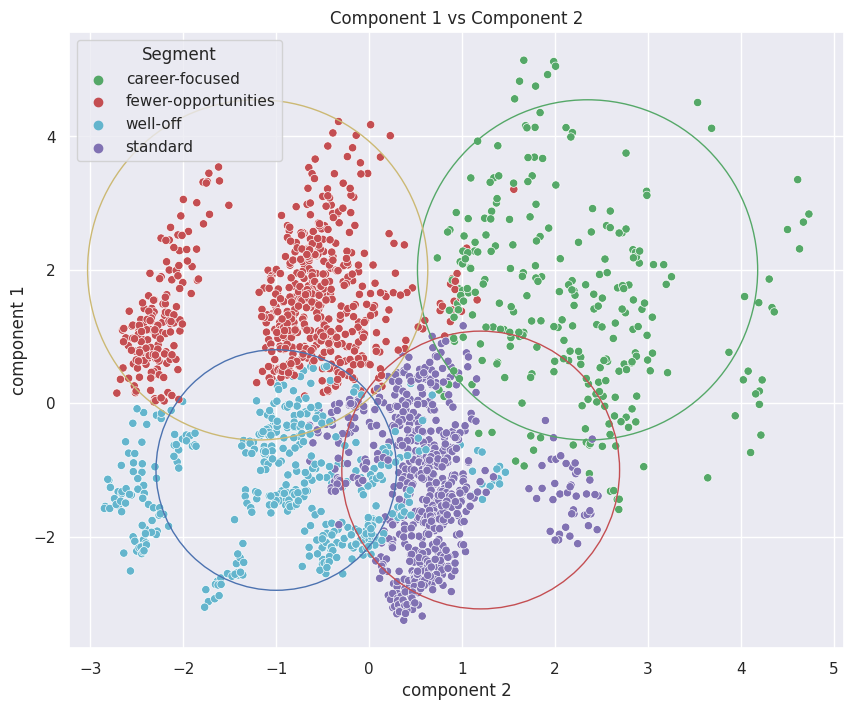

In [58]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()

### Observation

Performed dimension reduction using PCA and selected the dimensions based on variance explained

Applied K-Means clustering algorithm and estimated optimum number of clusters as k = 4 using the Elbow method